In [12]:
import geokit as gk
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [13]:
gk.__version__

'1.2.8'

# Raster

Information included in raster-files:
1. width: number of pixel x-direction
1. height: number of pixel in y-direction
1. resolution
1. extent: relevant geospatial extent
1. datatype
1. srs

In [25]:
# create a raster from a matrix
raster_matrix = np.array([[1,2,3],
                          [2,2,2],
                          [3,2,1],])

ras = gk.raster.createRaster( 
        bounds = [5,48,8,51], 
        pixelWidth=1, 
        pixelHeight=1, 
        data=raster_matrix,
        srs=gk.srs.EPSG4326)

c:\users\ra.maier\code\geokit\geokit\core\raster.py:1560: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(h, cax=cbax, **tmp)


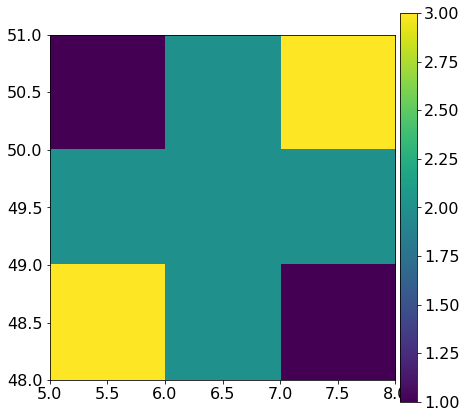

In [32]:
axh = gk.drawRaster(ras, srs=gk.srs.EPSG4326, figsize=(6,6))
plt.show()

In [27]:
# extract matrix
gk.raster.extractMatrix( ras )

array([[1, 2, 3],
       [2, 2, 2],
       [3, 2, 1]])

## Extract value from a raster

In [33]:
# extract value at a given location by interpolating 
value_near = gk.raster.interpolateValues( 
                source=gk._test_data_['gsa-ghi-like.tif'],
                points=[(5.6,51.1),(5.7,51.1),(5.8,51.1)])
print(value_near)


value_interp = gk.raster.interpolateValues( 
                source=gk._test_data_['gsa-ghi-like.tif'],
                points=[(5.6,51.1),(5.7,51.1),(5.8,51.1)],
                mode="linear-spline")
print(value_interp)

[2.927 2.936 2.948]
[2.926      2.93450004 2.94799995]


## Polygonize a raster 
Poligonize a raster xyz with 'gk.raster.polygonizeRaster(xyz)'.

In [29]:
# polygonize a raster
ras_boolean = gk.raster.createRasterLike( 
                source=ras,
                data=raster_matrix==2)

polygonized_geoms = gk.raster.polygonizeRaster(ras_boolean)

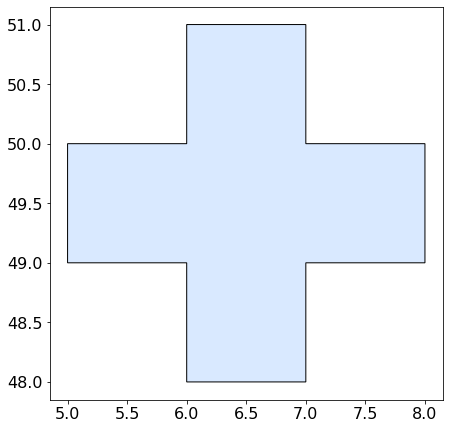

In [30]:
# draw polygonized geom
gk.drawGeoms(polygonized_geoms.geom[polygonized_geoms.value==1], figsize=(6,6))
plt.show()

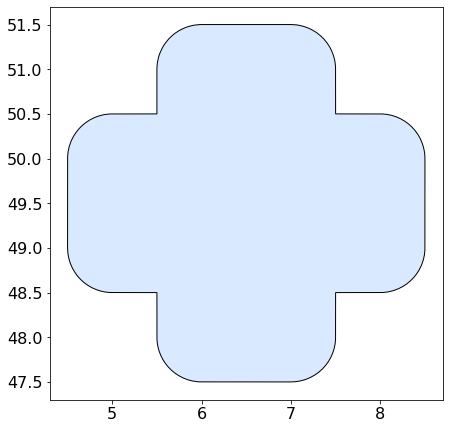

In [31]:
# draw polygonized geom with buffer
gk.drawGeoms(polygonized_geoms.geom[polygonized_geoms.value==1].iloc[0].Buffer(0.5), figsize=(6,6))
plt.show()

## Warp raster

c:\users\ra.maier\code\geokit\geokit\core\raster.py:1560: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(h, cax=cbax, **tmp)


AxHands(ax=<matplotlib.axes._axes.Axes object at 0x000001A557C7D430>, handles=<matplotlib.image.AxesImage object at 0x000001A557CDAD30>, cbar=<matplotlib.colorbar.Colorbar object at 0x000001A557CE70A0>)

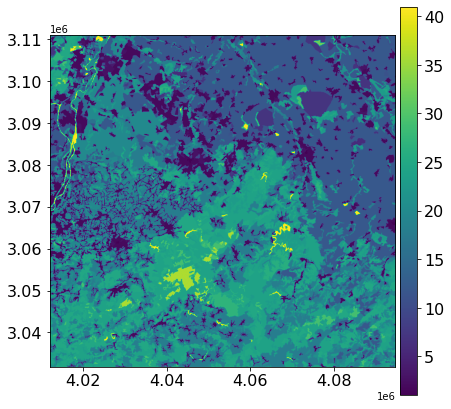

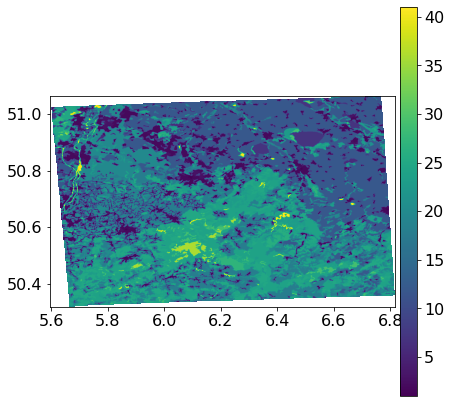

In [21]:
# Warp
gk.drawRaster(gk._test_data_['clc-aachen_clipped.tif'], figsize=(6,6))
warped_raster = gk.raster.warp(gk._test_data_['clc-aachen_clipped.tif'], srs=gk.srs.EPSG4326, resampleAlg='near')
gk.drawRaster(warped_raster, figsize=(6,6))